#Latviešu valodas runas atpazīšana

Šajā bloknotā ir rīki latviešu valodas runas atpazīšanai. Tiek izmantots LU MII AiLab izveidotais [runas atpazīšanas modelis](https://huggingface.co/AiLab-IMCS-UL/whisper-large-v3-lv-late-cv17), kas veidots izmantojot [Balsu talkā](https://balsutalka.lv/) savāktos datus.

Lai veiktu runas atpazīšanu audio failā sekojiet zemāk uzskaitītajiem soļiem.

##1. Nomainiet izpildlaika veidu uz T4 GPU

Lai to izdarītu galvenajā izvēlnē šīs lapas augšpusē ejiet uz `Izpildlaiks` -> `Mainīt izpildlaika veidu` un izvēlieties `T4 GPU`

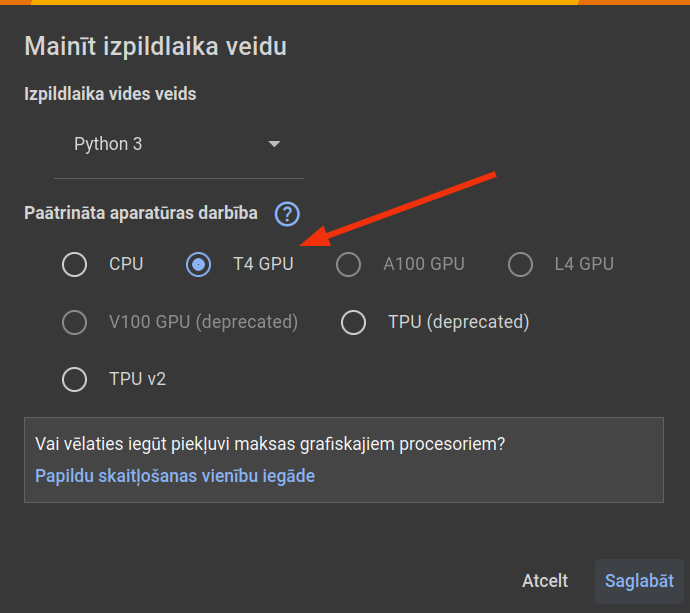

In [ ]:
#@title 2. Nospiediet uz atskaņošanas pogas, lai ielādētu nepieciešamos rīkus.

import ipywidgets as widgets
from IPython.display import clear_output
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline

uploader = widgets.FileUpload(description='Izvēlieties audio', accept='audio/*', multiple=False)
# uploader = widgets.FileUpload(multiple=False)
display(uploader)

##3. Izvēlieties audio failu
Pēc rīku ielādes parādīsies poga "Izvēlieties audio", nospiediet to un izvēlieties audio failu kurā atpazīt latviešu valodas runu.

In [ ]:
# @title 4. Palaidiet runas atpazīšanas procesu

if len(uploader.data) == 0:
  display(widgets.HTML(
    value="<h3>Audio fails nav izvēlēts, lūdzu izvēlieties audio failu!</h3>"
  ))
else:

  display(widgets.HTML(
      value="<h3>Notiek ielāde...</h3>"
  ))

  device = "cuda:0" if torch.cuda.is_available() else "cpu"
  torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

  model_id = "AiLab-IMCS-UL/whisper-large-v3-lv-late-cv17"

  model = AutoModelForSpeechSeq2Seq.from_pretrained(
      model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=False, use_safetensors=True
  ).to(device)

  processor = AutoProcessor.from_pretrained(model_id)

  pipe = pipeline(
      "automatic-speech-recognition",
      generate_kwargs={"language": "latvian", "task": "transcribe"},
      model=model,
      tokenizer=processor.tokenizer,
      feature_extractor=processor.feature_extractor,
      max_new_tokens=225,
      chunk_length_s=30,
      batch_size=16,
      return_timestamps=False,
      torch_dtype=torch_dtype,
      device=device,
  )

  clear_output()

  display(widgets.HTML(
      value="<h3>Notiek audio atpazīšana...</h3>"
  ))

  result = pipe(uploader.data[0])

  with open('transcript.txt', 'w') as f:
      f.write(result["text"])

  result_widget = widgets.HTML(
      value=result["text"]
  )

  clear_output()

  display(widgets.HTML(
      value=result["text"]
  ))

## 5. Saglabājiet audio failā atpazīto tekstu
Pēc audio faila apstrādes tajā atpazītais teksts tiks izdrukāts zem ceturtā soļa šūnas, kā arī tas tiks saglabāts teksta failā `transcript.txt`. Lai apskatītu šo failu uzklikšķiniet uz mapītes ikonas ekrāna sānā.

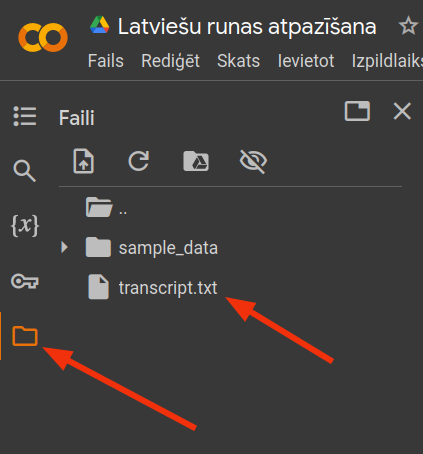
